In [103]:
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [104]:
def create_name(config):
    if config['mode'] == 'quantum':
        return f'quantum_{config["quantum"]["layers"]}_{config["quantum"]["qubits"]}'
    elif config['mode'] == 'classical':
        return f'classical_{config["classical"]["layers"]}_{config["classical"]["neurons"]}'

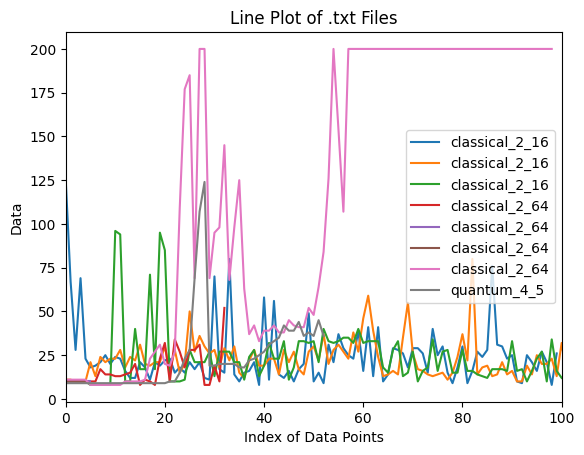

In [105]:
import yaml

root_dir = '../results'
data = []

for dir in os.listdir(root_dir):
    # open file in directory called results
    path = os.path.join(root_dir, dir)
    results_path = os.path.join(path, 'results.txt')
    config_path = os.path.join(path, 'config.yml')

    with open(config_path, 'r') as f:
        config = yaml.load(f, Loader=yaml.FullLoader)

    with open(results_path, 'r') as f:
        content = f.read()

    content = content[1:]
    content = [x for x in content.split(',')]
    if '' in content:
        content.remove('')
    content = [float(x) for x in content]

    name = create_name(config)

    data.append(dict(x=list(range(len(content))), y=content, name=name))

for i in data:
    sns.lineplot(x=i['x'], y=i['y'], label=i['name'])

plt.title('Line Plot of .txt Files')
plt.xlabel('Index of Data Points')
plt.ylabel('Data')
plt.xlim(0, 100)
plt.show()
